# 1. 라이브러리 불러오기

In [10]:
import os
import sys
import json
import platform

import pandas as pd
import numpy as np
pd.set_option('max.columns', 100)

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.style.use('ggplot')
%matplotlib inline

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

# 2. 데이터 불러오기

In [3]:
# Load dataset
recycle_data = pd.read_csv('./data/전국재활용센터표준데이터.csv', encoding = 'EUC-KR')
print('Shape of data *Before Delete* :', recycle_data.shape, '\n')

# 결측치 확인 결과 '충청북도', '인천광역시', '전라남도'이므로, 제거
recycle_data = recycle_data.dropna(subset = ['소재지도로명주소'])
print('Shape of data *After Delete* :', recycle_data.shape, '\n')

display(recycle_data.head(2))

Shape of data *Before Delete* : (208, 25) 

Shape of data *After Delete* : (205, 25) 



,재활용센터명,재활용센터운영구분,소재지도로명주소,소재지지번주소,위도,경도,면적,설립연월,차량보유대수,주요취급품목정보,운영기관명,운영기관전화번호,운영기관대표자명,평일운영시작시각,평일운영종료시각,공휴일운영시작시각,공휴일운영종료시각,휴무일정보,애프터서비스정보,홈페이지주소,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,대청면 대청 재활용 선별장,직영,인천광역시 옹진군 대청면 대청북로 53,인천광역시 옹진군 대청면 대청리 산16-26,37.839209,124.705303,415.0,2020-07,2,종이류+고철류+캔류+병류+플라스틱류+필름류+스티로폼류,인천광역시 옹진군 대청면,032-899-3610,장정민,09:00,18:00,09:00,13:00,일요일,NaN,NaN,032-899-2620,인천광역시 옹진군,2020-11-19,3580000,인천광역시 옹진군
1,자월면 대이작 재활용 선별장,직영,인천광역시 옹진군 자월면 대이작로 159번길 127,인천광역시 옹진군 자월면 이작리 394-3,37.174685,126.264866,1351.0,2020-11,0,종이류+고철류+캔류+병류+플라스틱류+필름류+스티로폼류,인천광역시 옹진군 자월면,032-899-3750,장정민,09:00,18:00,09:00,13:00,일요일,NaN,NaN,032-899-2620,인천광역시 옹진군,2020-11-19,3580000,인천광역시 옹진군


In [4]:
print('Shape of data *Before Create* :', recycle_data.shape, '\n')

# 소재지도로명 주소에서 '시/도명' 추출
for index in recycle_data.index:
    
    # 소재지도로명 변수에서 시도명을 나타내는 부분을 추출
    value = recycle_data.loc[index, '소재지도로명주소'].split()[0]
    recycle_data.loc[index, '시도명'] = value

# '서을특별시'로 기입되어 있는 관측치 바꿔주기
recycle_data.loc[recycle_data['시도명'] == '서을특별시', '시도명'] = '서울특별시'

print('Shape of data *After Create* :', recycle_data.shape)

Shape of data *Before Create* : (205, 25) 

Shape of data *After Create* : (205, 26)


# 3. 데이터 탐색

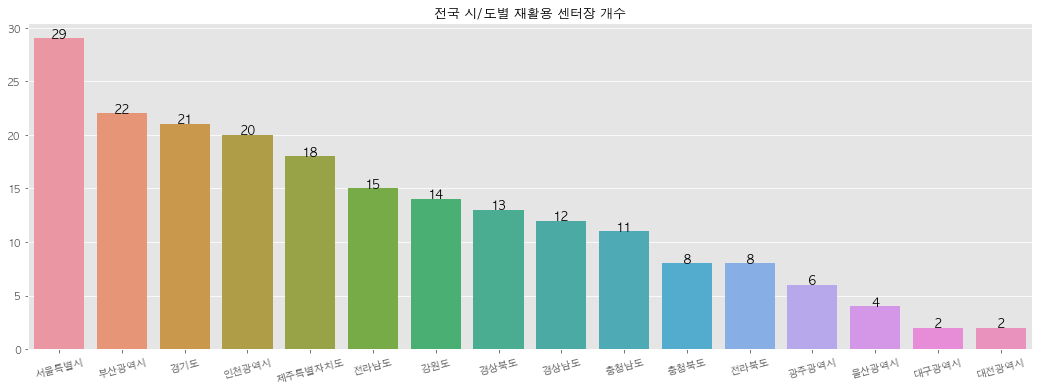

In [5]:
plot_data = pd.DataFrame(recycle_data['시도명'].value_counts())

# 지역별로 시각화
plt.figure(figsize = (18, 6))

sns.barplot(x = plot_data.index, y = '시도명', data = plot_data)
plt.xticks(rotation = 15)
plt.ylabel('')
plt.title('전국 시/도별 재활용 센터장 개수', fontsize = 13)

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, fontsize = 12, ha = 'center')
    
plt.show()

## 3.1 서울시 데이터 추출

In [6]:
# 서울 데이터만 추출
seoul_recycle_data = recycle_data[recycle_data['시도명'] == '서울특별시'].reset_index(drop = True)
print('Shape of Seoul Recycle Center data :', seoul_recycle_data.shape)

# 데이터 일부분 확인
display(seoul_recycle_data.head(2))

Shape of Seoul Recycle Center data : (29, 26)


,재활용센터명,재활용센터운영구분,소재지도로명주소,소재지지번주소,위도,경도,면적,설립연월,차량보유대수,주요취급품목정보,운영기관명,운영기관전화번호,운영기관대표자명,평일운영시작시각,평일운영종료시각,공휴일운영시작시각,공휴일운영종료시각,휴무일정보,애프터서비스정보,홈페이지주소,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,시도명
0,재활용센터1관,위탁,서을특별시 노원구 화랑로 486,서을특별시 노원구 공릉동 656-5,37.619127,127.078994,570.50,2020-01,3,중고 가전 및 가구류,노원리싸이클링,02-974-7282,최남현,10:00,19:00,10:00,19:00,NaN,NaN,http://www.recyclenw.co.kr/,02-2116-3810,노원구 자원순환과,2020-07-10,3100000,서울특별시 노원구,서울특별시
1,재활용센터2관,위탁,서을특별시 노원구 덕릉로 639,서을특별시 노원구 중계동 210-7,37.654699,127.071740,569.12,2001-11,1,중고 가전 및 가구류,노원리싸이클링,02-933-8289,최남현,10:00,19:00,10:00,19:00,NaN,NaN,http://www.recyclenw.co.kr/,02-2116-3810,노원구 자원순환과,2020-07-10,3100000,서울특별시 노원구,서울특별시


In [7]:
print('Shape of Seoul Recycle Center data *Before Create* :', seoul_recycle_data.shape, '\n')

# '군구'를 나타내는 변수 생성
for index in seoul_recycle_data.index:
    
    # 소재지도로명 변수에서 군구명을 나타내는 부분을 추출
    value = seoul_recycle_data.loc[index, '소재지도로명주소'].split()[1]
    seoul_recycle_data.loc[index, '군구명'] = value

print('Shape of Seoul Recycle Center data *After Create* :', seoul_recycle_data.shape)

Shape of Seoul Recycle Center data *Before Create* : (29, 26) 

Shape of Seoul Recycle Center data *After Create* : (29, 27)


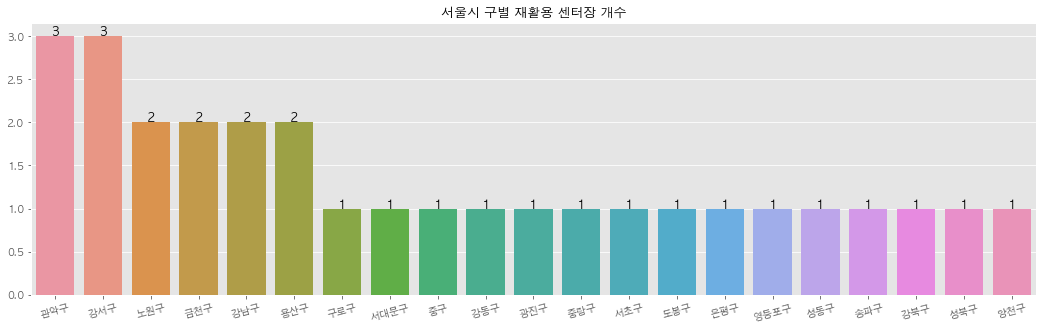

In [8]:
plot_data = pd.DataFrame(seoul_recycle_data['군구명'].value_counts())

# 지역별로 시각화
plt.figure(figsize = (18, 5))

sns.barplot(x = plot_data.index, y = '군구명', data = plot_data)
plt.xticks(rotation = 15)
plt.ylabel('')
plt.title('서울시 구별 재활용 센터장 개수', fontsize = 13)

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, fontsize = 12, ha = 'center')
    
plt.show()

In [21]:
# 서울시 시군구 경게를 표시하기 위한 JSON 데이터 불러오기
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding = 'utf-8'))

# 데이터 가공
chor_data = pd.DataFrame(seoul_recycle_data['군구명'].value_counts())

# 서울시청을 위치로 한 지도 맵 생성
seoul_map = folium.Map(location = [37.413294, 126.734086], zoom_start = 8)

# 서울시 구별 재활용 센터 지도 시각화
seoul_map.choropleth(geo_data = geo_data,
                     data = chor_data['군구명'],
                     columns = [chor_data.index, chor_data['군구명']],
                     key_on = 'feature.id',
                     fill_color = 'PuRd')

# 서울시 구별 재활용 센터 위치 표시하기
for index in seoul_recycle_data.index:
    folium.CircleMarker(location = [seoul_recycle_data.loc[index, '위도'], seoul_recycle_data.loc[index, '경도']],
                        color = 'blue', 
                        fill_color = 'blue',
                        popup = seoul_recycle_data.loc[index, '재활용센터명'],
                        radius = 5).add_to(seoul_map)

In [22]:
seoul_map

- 전국 재활용 센터장 데이터를 가지고는 인사이트를 도출하는데 힘들것으로 판단된다.